In [5]:
pip install ucimlrepo

/tmp/ipython-input-9-142754828.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if y.dtypes[0] == object or y.dtypes.name == "category":


Acurácia: 1.0
Precisão: 1.0
Revocação: 1.0
F1-Score: 1.0

Relatório de Classificação:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



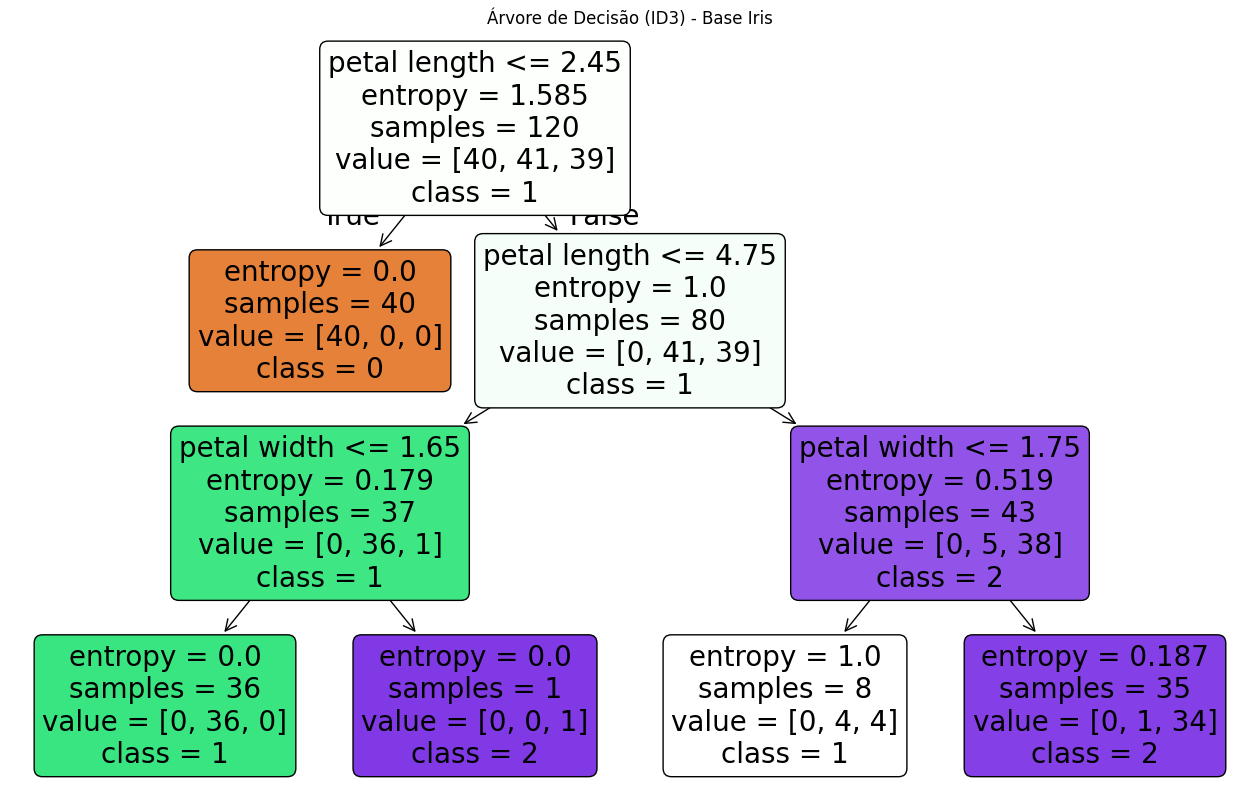

In [9]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Carregar a base de dados Iris do repositório UCI
iris = fetch_ucirepo(id=53)

# 2. Separar dados (X) e rótulos (y)
X = iris.data.features
y = iris.data.targets

# 3. Codificar os rótulos se forem categóricos (texto)
if y.dtypes[0] == object or y.dtypes.name == "category":
    le = LabelEncoder()
    y = le.fit_transform(y.values.ravel())

# 4. Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Criar e treinar o classificador com entropia (ID3)
# Criar e treinar o classificador com entropia (ID3) e profundidade limitada
modelo = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=3)
modelo.fit(X_train, y_train)

# 6. Fazer previsões
y_pred = modelo.predict(X_test)

# 7. Avaliar desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred, average='macro'))
print("Revocação:", recall_score(y_test, y_pred, average='macro'))
print("F1-Score:", f1_score(y_test, y_pred, average='macro'))

# Relatório por classe
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

# 8. Visualizar a árvore de decisão
plt.figure(figsize=(16, 10))
tree.plot_tree(
    modelo,
    feature_names=X.columns,
    class_names=[str(c) for c in sorted(set(y))],
    filled=True,
    rounded=True
)
plt.title("Árvore de Decisão (ID3) - Base Iris")
plt.show()


In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
# Carregar dataset Iris
iris = load_iris()
X = iris.data
y = iris.target
# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Criar o modelo Naive Bayes
modelo = GaussianNB()
# Treinar o modelo
modelo.fit(X_train, y_train)
# Fazer previsões
y_pred = modelo.predict(X_test)
# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred,
target_names=iris.target_names))

Acurácia: 0.9777777777777777

Relatório de Classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



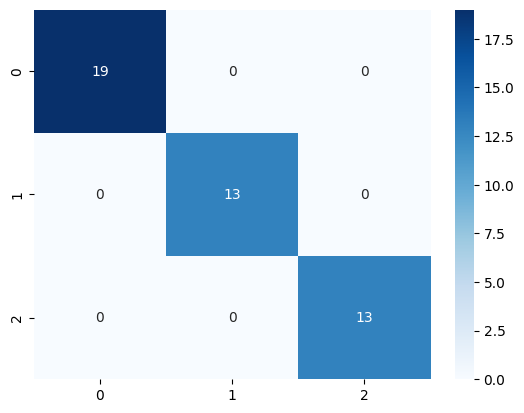

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.show()